In [ ]:
from gensim.models import Word2Vec

In [ ]:
import nltk,csv,numpy
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize, pos_tag
sentences=[]
reader = csv.reader(open('/content/FlipkartReview.csv', 'rU'), delimiter= ",",quotechar='|')
for line in reader:
    for field in line:
      sentences.append(word_tokenize(field))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[['Title'], ['Review'], ['Rating'], ['Reviewer_name'], ['Very', 'Good'], ['``', 'I', 'ordered', 'this', 'mobile', 'for', 'my', 'sister', '.', '(', 'Online', 'classes', ')', 'It', 'works', 'well', 'for', 'day', 'to', 'day', 'use.Here', 'is', 'my', 'review', 'after', '10', 'days', 'of', 'use', ':', 'This', 'mobile', 'is', 'good', 'for', 'you'], ['but', 'if', 'you', 'are', 'planing', 'to', 'play', 'games', 'like', 'PUBG'], ['COD', 'ect', '.', 'Don', '’', 't', 'buy', 'this', 'Camera-', '3/5', 'camera', 'is', 'disappointing', 'both', 'front', 'and', 'back', '.', 'Also', 'the', 'front', 'camera', 'is', 'slow', 'as', 'well.Face', 'lock-', '3/5', 'average', 'one'], ['it', 'don', '’', 't', 'work', 'in', 'low', 'light', '.', 'Display-', '4/5', 'not', 'a', 'great', 'display', 'though', 'it', '’', 's', 'adjustable.Battery-', '4.5/5', 'it', 'has', 'good', 'battery', 'backup', '4000mah', 'but', 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


In [ ]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
#model = FastText(sentences, size=20, min_count=1, window=2,sg=0)

In [ ]:
model['this']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00255406, -0.01891297, -0.01436054,  0.01015202,  0.02046973,
       -0.01508475, -0.00443799,  0.01624553, -0.02088124, -0.01982679,
        0.01950826, -0.00237142,  0.01556885, -0.00464738,  0.00922685,
       -0.00635305,  0.00043834, -0.01063216,  0.00859862, -0.00574815],
      dtype=float32)

In [ ]:
model['is']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.02028034, -0.00022664, -0.00050968, -0.00735865, -0.0192455 ,
        0.01261262, -0.00073656, -0.01411636,  0.00318534,  0.02281497,
        0.0242647 ,  0.00992498,  0.00134927,  0.00620792,  0.00227989,
       -0.00837242, -0.0123754 ,  0.00553096, -0.01259787, -0.00328897],
      dtype=float32)

In [ ]:
model.similarity('Review','product')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.06511628

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


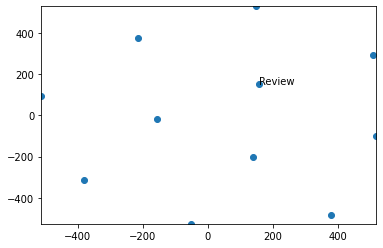

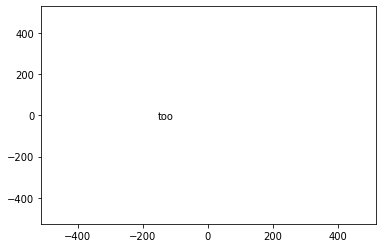

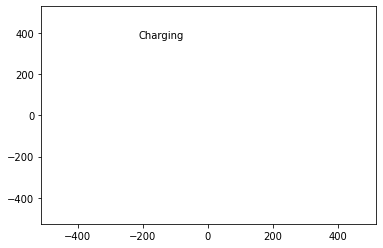

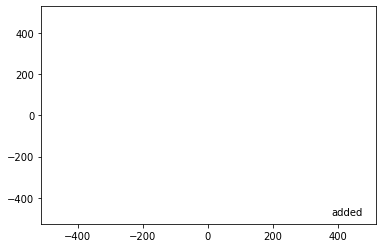

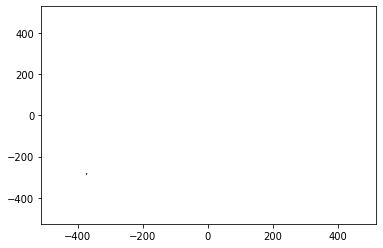

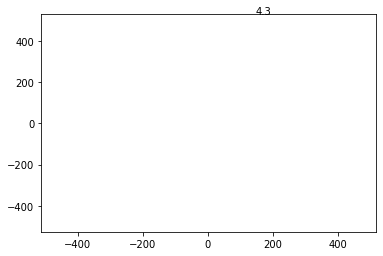

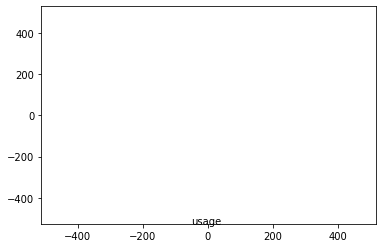

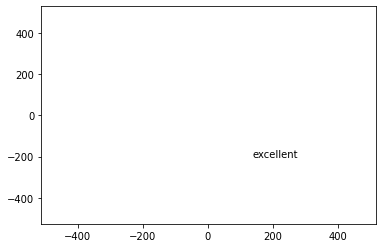

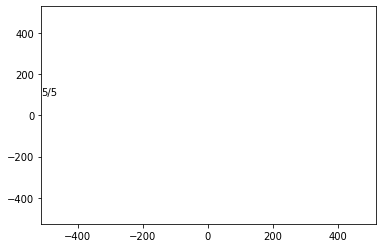

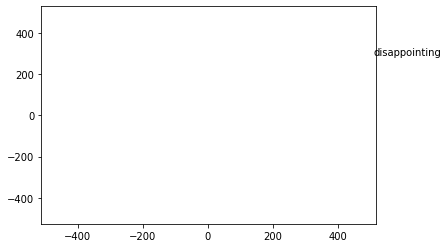

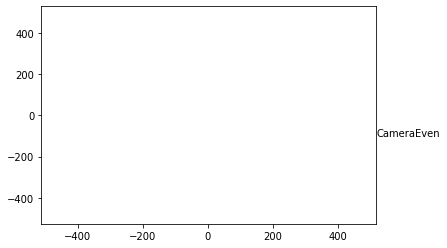

In [ ]:
display_closestwords_tsnescatterplot(model, 'Review', 20)

In [ ]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
